In [2]:
import os
import shutil

%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib
import numpy as np
import pydicom
import cv2

from tqdm import tqdm
from skimage.exposure import rescale_intensity
from PIL import Image

In [2]:
# Ruta del archivo donde guardaste el array de imágenes
ruta_archivo = "imagenes/Normal/nombre.npy"

# Cargar el array de imágenes
imagenes_recuperadas = np.load(ruta_archivo)

FileNotFoundError: [Errno 2] No such file or directory: 'imagenes/Normal/nombre.npy'

In [ ]:
# Directorio donde se encuentran las imágenes
directorio = "imagenes/Normal/"

# Obtener la lista de archivos en el directorio
archivos = os.listdir(directorio)

# Seleccionar los primeros 5 archivos
archivos_5_primeros = archivos[:5]

# Crear una lista para almacenar los arrays de imágenes
imagenes_cargadas = []

# Cargar cada uno de los archivos
for archivo in archivos_5_primeros:
    ruta_archivo = os.path.join(directorio, archivo)
    imagen = np.load(ruta_archivo)
    imagenes_cargadas.append(imagen)

# Verificar las dimensiones de las imágenes cargadas
for i, imagen in enumerate(imagenes_cargadas, 1):
    print(f"Dimensiones de la imagen {i}: {imagen.shape}")

In [3]:
def resizeAndSave(npArrayImag, tamano_cuadrado, ruta):
    """
    Redimensiona cada imagen en un np.ndarray y las guarda en un archivo usando np.save.

    Args:
    - npArrayImag (np.ndarray): Un array de NumPy que contiene las imágenes.
    - tamano_cuadrado (int): El tamaño al que se redimensionarán las imágenes (ancho y alto).
    - ruta (str): La ruta donde se guardará el archivo con las imágenes redimensionadas.
    """
    # Crear un nuevo array para almacenar las imágenes redimensionadas
    imagenes_redimensionadas = np.zeros((5, tamano_cuadrado, tamano_cuadrado))

    # Redimensionar cada imagen y guardarla en el nuevo array
    for i in range(5):
        # Redimensionar la imagen a un tamaño cuadrado y más pequeño
        imagen_redimensionada = cv2.resize(npArrayImag[i], (tamano_cuadrado, tamano_cuadrado))
        imgu8 = convert(imagen_redimensionada, 0, 255, np.uint8)
        imagenes_redimensionadas[i] = imgu8

    # Guardar el array de imágenes redimensionadas en un archivo
    np.save(ruta, imagenes_redimensionadas)

    # print("Imágenes redimensionadas guardadas en:", ruta)

In [7]:
#Seleccionar 800 training 

# Cargar el DataFrame desde un archivo pickle serializado
merged_df = pd.read_pickle("data/merged_df_serialized.pickle")
# Tamaño cuadrado deseado para las imágenes (en píxeles)
tamano_cuadrado = 200
nNormal, nActionable, nBenign, nCancer = 0, 0, 0, 0

# Iterar sobre las filas del DataFrame merged_df
for index, row in tqdm(merged_df.iterrows(), total=merged_df.shape[0], desc="Cargando imágen"):
    if index != 840:
        view = row["View"]
        nombreOriginal=f"{view}-{index}.npy"
        nombre = f"{view}-{index}-{tamano_cuadrado}px.npy"


        if row["Normal"] == 1:
            if nNormal < 200:
                npArrayImag = np.load(os.path.join("imagenes/Normal", nombreOriginal))
                nNormal+=1
                resizeAndSave(npArrayImag, tamano_cuadrado, os.path.join("/media/miguel/SYSTEM/breastCancerlow/Training/Normal/", nombre))
            elif nNormal < 250:
                npArrayImag = np.load(os.path.join("imagenes/Normal", nombreOriginal))
                nNormal+=1
                resizeAndSave(npArrayImag, tamano_cuadrado, os.path.join("/media/miguel/SYSTEM/breastCancerlow/Validation/Normal/", nombre))
            elif nNormal < 275:
                npArrayImag = np.load(os.path.join("imagenes/Normal", nombreOriginal))
                nNormal+=1
                resizeAndSave(npArrayImag, tamano_cuadrado, os.path.join("/media/miguel/SYSTEM/breastCancerlow/Test/Normal/", nombre))
        elif row["Actionable"] == 1:
            if nActionable < 200:
                npArrayImag = np.load(os.path.join("imagenes/Actionable", nombreOriginal))
                nActionable+=1
                resizeAndSave(npArrayImag, tamano_cuadrado, os.path.join("/media/miguel/SYSTEM/breastCancerlow/Training/Actionable/", nombre))
            elif nActionable < 250:
                npArrayImag = np.load(os.path.join("imagenes/Actionable", nombreOriginal))
                nActionable+=1
                resizeAndSave(npArrayImag, tamano_cuadrado, os.path.join("/media/miguel/SYSTEM/breastCancerlow/Validation/Actionable/", nombre))
            elif nActionable < 275:
                npArrayImag = np.load(os.path.join("imagenes/Actionable", nombreOriginal))
                nActionable+=1
                resizeAndSave(npArrayImag, tamano_cuadrado, os.path.join("/media/miguel/SYSTEM/breastCancerlow/Test/Actionable/", nombre))
        elif row["Benign"] == 1:
            if nBenign < 200:
                npArrayImag = np.load(os.path.join("imagenes/Benign", nombreOriginal))
                nBenign+=1
                resizeAndSave(npArrayImag, tamano_cuadrado, os.path.join("/media/miguel/SYSTEM/breastCancerlow/Training/Benign/", nombre))
            elif nBenign < 250:
                npArrayImag = np.load(os.path.join("imagenes/Benign", nombreOriginal))
                nBenign+=1
                resizeAndSave(npArrayImag, tamano_cuadrado, os.path.join("/media/miguel/SYSTEM/breastCancerlow/Validation/Benign/", nombre))
            elif nBenign < 275:
                npArrayImag = np.load(os.path.join("imagenes/Benign", nombreOriginal))
                nBenign+=1
                resizeAndSave(npArrayImag, tamano_cuadrado, os.path.join("/media/miguel/SYSTEM/breastCancerlow/Test/Benign/", nombre))
        elif row["Cancer"] == 1:
            if nCancer < 200:
                npArrayImag = np.load(os.path.join("imagenes/Cancer", nombreOriginal))
                nCancer+=1
                resizeAndSave(npArrayImag, tamano_cuadrado, os.path.join("/media/miguel/SYSTEM/breastCancerlow/Training/Cancer/", nombre))
            elif nCancer < 250:
                npArrayImag = np.load(os.path.join("imagenes/Cancer", nombreOriginal))
                nCancer+=1
                resizeAndSave(npArrayImag, tamano_cuadrado, os.path.join("/media/miguel/SYSTEM/breastCancerlow/Validation/Cancer/", nombre))
            elif nCancer < 275:
                npArrayImag = np.load(os.path.join("imagenes/Cancer", nombreOriginal))
                nCancer+=1
                resizeAndSave(npArrayImag, tamano_cuadrado, os.path.join("/media/miguel/SYSTEM/breastCancerlow/Test/Cancer/", nombre))

print ("nNormal, nActionable, nBenign, nCancer",nNormal, nActionable, nBenign, nCancer)

Cargando imágen: 100%|██████████████████████| 1163/1163 [01:42<00:00, 11.35it/s]

nNormal, nActionable, nBenign, nCancer 275 160 38 37


In [9]:
conteo_Normal = merged_df["Normal"].value_counts()
conteo_Actionable = merged_df["Actionable"].value_counts()
conteo_Benign = merged_df["Benign"].value_counts()
conteo_Cancer = merged_df["Cancer"].value_counts()

# Mostrar los distintos valores y sus conteos
print(conteo_Normal)
print(conteo_Actionable)
print(conteo_Benign)
print(conteo_Cancer)

Normal
1    928
0    235
Name: count, dtype: int64
Actionable
0    1003
1     160
Name: count, dtype: int64
Benign
0    1125
1      38
Name: count, dtype: int64
Cancer
0    1126
1      37
Name: count, dtype: int64


Breast-Cancer-Screening-DBT/DBT-P00431/01-01-2000-DBT-S03956-MAMMO diagnostic digital bilateral-25878/17599.000000-57324/1-1.dcm
DBT-P00431
rmlo
imagenes/Cancer/rmlo-25.npy


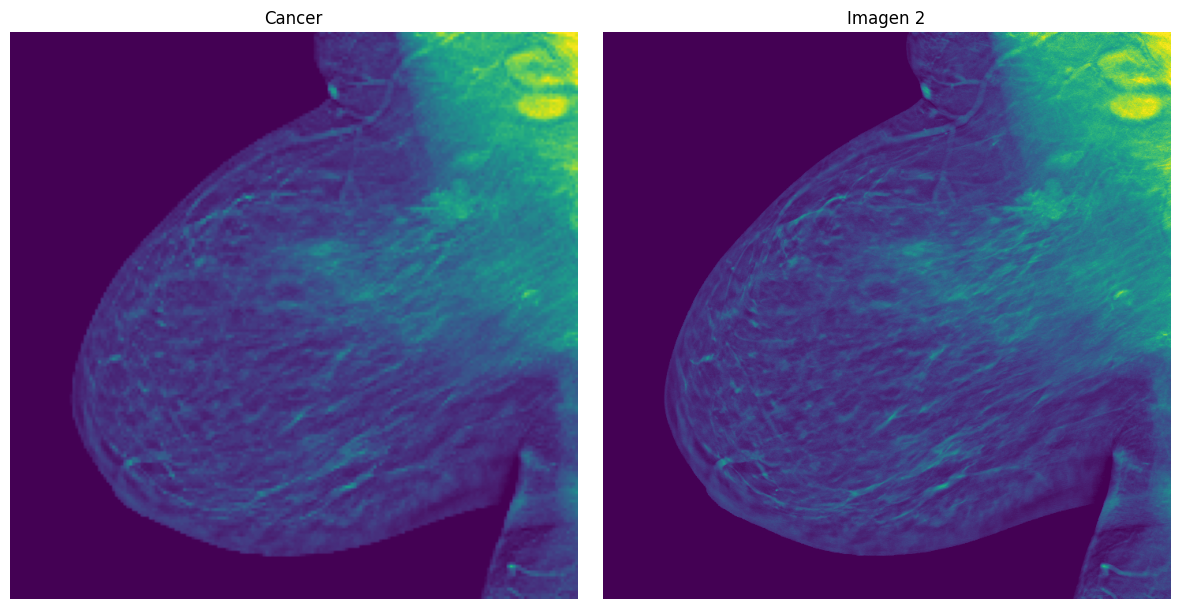

imagenes_redimensionadas pixel:  8
imagenes_redimensionadas.shape:  (200, 200)
imagenes_redimensionadas tamaño:  320000
Ocupa en bytes:  8
(720, 720)


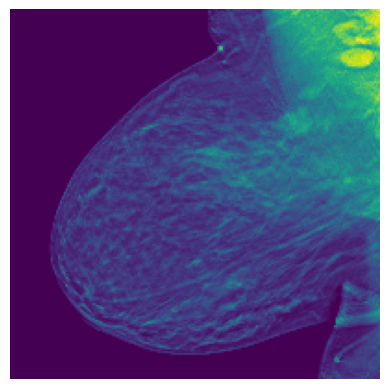

imagenes_redimensionadas pixel:  16
imagenes_redimensionadas.shape:  (200, 200, 4)
imagenes_redimensionadas tamaño:  640000
======CV2 IMagenes=========
imagenes_redimensionadas pixel:  1
imagenes_redimensionadas.shape:  (200, 200)
imagenes_redimensionadas tamaño:  40000


In [18]:
# Cargar el DataFrame desde un archivo pickle serializado
tamano_cuadrado=200
merged_df = pd.read_pickle("data/merged_df_serialized.pickle")
index=25
row = merged_df.iloc[index]
view = row["View"]
nombre = f"{view}-{index}.npy"
print(row["descriptive_path"])
print(row["PatientID"])
print(row["View"])

imagenes_redimensionadas = np.zeros((5, tamano_cuadrado, tamano_cuadrado))
        
titulo = "Nada"

if row["Normal"] == 1:
    npArrayImag = np.load(os.path.join("imagenes/Normal", nombre))
    titulo = "Normal"
    # Redimensionar cada imagen y guardarla en el nuevo array
    for i in range(5):
        # Redimensionar la imagen a un tamaño cuadrado y más pequeño
        imagen_redimensionada = cv2.resize(npArrayImag[i], (tamano_cuadrado, tamano_cuadrado))
        imagenes_redimensionadas[i] = imagen_redimensionada
    #print(os.path.join("imagenes/Normal", nombre))
if row["Actionable"] == 1:
    npArrayImag = np.load(os.path.join("imagenes/Actionable", nombre))
    titulo = "Actionable"
    # Redimensionar cada imagen y guardarla en el nuevo array
    for i in range(5):
        # Redimensionar la imagen a un tamaño cuadrado y más pequeño
        imagen_redimensionada = cv2.resize(npArrayImag[i], (tamano_cuadrado, tamano_cuadrado))
        imagenes_redimensionadas[i] = imagen_redimensionada
    #print(os.path.join("imagenes/Actionable", nombre))
if row["Benign"] == 1:
    npArrayImag = np.load(os.path.join("imagenes/Benign", nombre))
    titulo = "Benign"
    # Redimensionar cada imagen y guardarla en el nuevo array
    for i in range(5):
        # Redimensionar la imagen a un tamaño cuadrado y más pequeño
        imagen_redimensionada = cv2.resize(npArrayImag[i], (tamano_cuadrado, tamano_cuadrado))
        imagenes_redimensionadas[i] = imagen_redimensionada
    #print(os.path.join("imagenes/Benign", nombre))
if row["Cancer"] == 1:
    npArrayImag = np.load(os.path.join("imagenes/Cancer", nombre))
    titulo = "Cancer"
    # Redimensionar cada imagen y guardarla en el nuevo array
    for i in range(5):
        # Redimensionar la imagen a un tamaño cuadrado y más pequeño
        imagen_redimensionada = cv2.resize(npArrayImag[i], (tamano_cuadrado, tamano_cuadrado))
        imagenes_redimensionadas[i] = imagen_redimensionada
    print(os.path.join("imagenes/Cancer", nombre))



# Crear una nueva figura con dos subgráficos
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Mostrar la primera imagen en el primer subgráfico
axs[0].imshow(imagenes_redimensionadas[1])
axs[0].set_title(titulo)
axs[0].axis('off')  # Oculta los ejes

# Mostrar la segunda imagen en el segundo subgráfico
axs[1].imshow(npArrayImag[1])
axs[1].set_title('Imagen 2')
axs[1].axis('off')  # Oculta los ejes

# Ajustar automáticamente el diseño de los subgráficos para evitar superposiciones
plt.tight_layout()

# Mostrar la figura con las dos imágenes
plt.show()

print("imagenes_redimensionadas pixel: ",imagenes_redimensionadas[0][100][100].nbytes)
print("imagenes_redimensionadas.shape: ",imagenes_redimensionadas[0].shape)
print("imagenes_redimensionadas tamaño: ",imagenes_redimensionadas[0].nbytes)

print("Ocupa en bytes: ",npArrayImag[0][100][100].nbytes)
print(npArrayImag[0].shape)
ruta = "ima.png"
plt.imsave(ruta, imagenes_redimensionadas[2])

# ================= Imagen color 3 Bytes ==========================
# Cargar la imagen en formato JPG
imagen_cargada = plt.imread(ruta)

# Mostrar la imagen
plt.imshow(imagen_cargada)
plt.axis('off')  # Ocultar los ejes
plt.show()

print("imagenes_redimensionadas pixel: ",imagen_cargada[100][100].nbytes)
print("imagenes_redimensionadas.shape: ",imagen_cargada.shape)
print("imagenes_redimensionadas tamaño: ",imagen_cargada.nbytes)


# ================= Imagen gris 1 Bytes ==========================
# Carga la imagen con cv2
imagen = cv2.imread(ruta)

imagen_gris = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)

# Muestra la imagen original y la imagen en escala de grises
cv2.imshow('Imagen original', imagen)
cv2.imshow('Imagen en escala de grises', imagen_gris)
cv2.waitKey(0)
cv2.destroyAllWindows()

cv2.imwrite('cv2I.png', imagen_gris)
alto,ancho =imagen_gris.shape
tamanio_bytes = imagen_gris.nbytes/(alto*ancho)
print("======CV2 IMagenes=========")
print("imagenes_redimensionadas pixel: ",imagen_gris[100][100].nbytes)
print("imagenes_redimensionadas.shape: ",imagen_gris.shape)
print("imagenes_redimensionadas tamaño: ",imagen_gris.nbytes)

In [7]:
# Cargar el DataFrame desde un archivo pickle serializado
tamano_cuadrado=200
merged_df = pd.read_pickle("data/merged_df_serialized.pickle")
index=25
row = merged_df.iloc[index]
view = row["View"]
nombre = f"{view}-{index}.npy"
print(row["descriptive_path"])
print(row["PatientID"])
print(row["View"])

imagenes_redimensionadas = np.zeros((5, tamano_cuadrado, tamano_cuadrado))
        
titulo = "Nada"

if row["Normal"] == 1:
    npArrayImag = np.load(os.path.join("imagenes/Normal", nombre))
    titulo = "Normal"
    # Redimensionar cada imagen y guardarla en el nuevo array
    for i in range(5):
        # Redimensionar la imagen a un tamaño cuadrado y más pequeño
        imagen_redimensionada = cv2.resize(npArrayImag[i], (tamano_cuadrado, tamano_cuadrado))
        imagenes_redimensionadas[i] = imagen_redimensionada
    #print(os.path.join("imagenes/Normal", nombre))
if row["Actionable"] == 1:
    npArrayImag = np.load(os.path.join("imagenes/Actionable", nombre))
    titulo = "Actionable"
    # Redimensionar cada imagen y guardarla en el nuevo array
    for i in range(5):
        # Redimensionar la imagen a un tamaño cuadrado y más pequeño
        imagen_redimensionada = cv2.resize(npArrayImag[i], (tamano_cuadrado, tamano_cuadrado))
        imagenes_redimensionadas[i] = imagen_redimensionada
    #print(os.path.join("imagenes/Actionable", nombre))
if row["Benign"] == 1:
    npArrayImag = np.load(os.path.join("imagenes/Benign", nombre))
    titulo = "Benign"
    # Redimensionar cada imagen y guardarla en el nuevo array
    for i in range(5):
        # Redimensionar la imagen a un tamaño cuadrado y más pequeño
        imagen_redimensionada = cv2.resize(npArrayImag[i], (tamano_cuadrado, tamano_cuadrado))
        imagenes_redimensionadas[i] = imagen_redimensionada
    #print(os.path.join("imagenes/Benign", nombre))
if row["Cancer"] == 1:
    npArrayImag = np.load(os.path.join("imagenes/Cancer", nombre))
    titulo = "Cancer"
    # Redimensionar cada imagen y guardarla en el nuevo array
    for i in range(5):
        # Redimensionar la imagen a un tamaño cuadrado y más pequeño
        imagen_redimensionada = cv2.resize(npArrayImag[i], (tamano_cuadrado, tamano_cuadrado))
        imagenes_redimensionadas[i] = imagen_redimensionada
    print(os.path.join("imagenes/Cancer", nombre))

print (imagenes_redimensionadas[0].dtype)
imgu8 = convert(imagenes_redimensionadas[0], 0, 255, np.uint8)
cv2.imshow("Window", imgu8)
cv2.waitKey(0)
cv2.destroyAllWindows()
print("imagenes_redimensionadas pixel: ",imgu8[100][100].nbytes)
print("imagenes_redimensionadas.shape: ",imgu8.shape)
print("imagenes_redimensionadas tamaño: ",imgu8.nbytes)


Breast-Cancer-Screening-DBT/DBT-P04139/01-01-2000-DBT-S00873-MAMMO SCREENING DIGITAL BILATERAL-54333/5646.000000-87034/1-1.dcm
DBT-P04139
lcc
imagenes_redimensionadas.shape:  (5, 720, 720)
float64
imagenes_redimensionadas pixel:  1
imagenes_redimensionadas.shape:  (200, 200)
imagenes_redimensionadas tamaño:  40000


In [4]:
#convirte arrays float64 en unit8 con escala de grises
def convert(img, target_type_min, target_type_max, target_type):
    imin = img.min()
    imax = img.max()

    a = (target_type_max - target_type_min) / (imax - imin)
    b = target_type_max - a * imax
    new_img = (a * img + b).astype(target_type)
    return new_img